In [43]:
import testing as tst
from matplotlib import pyplot as plt
from talib import MA as ma
from importlib import reload
import FedTools as ft
import numpy as np

In [44]:
hawkishness = tst.create_index("prompt_1", "gpt-3.5-turbo")

2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20110622.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20170920.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20190918.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20140319.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20130918.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210728.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20230920.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20200303.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20210616.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20120125.json
2023-10-18 11:10:46 [info     ] retrieving gpt-3.5-turbo_prompt_1_FOMCpresconf20

In [45]:
rate = tst.get_fred("DGS5")[hawkishness.index[0]:].dropna()
inflation = tst.get_fred("CPIAUCSL").pct_change(12)[hawkishness.index[0]:].dropna()*100

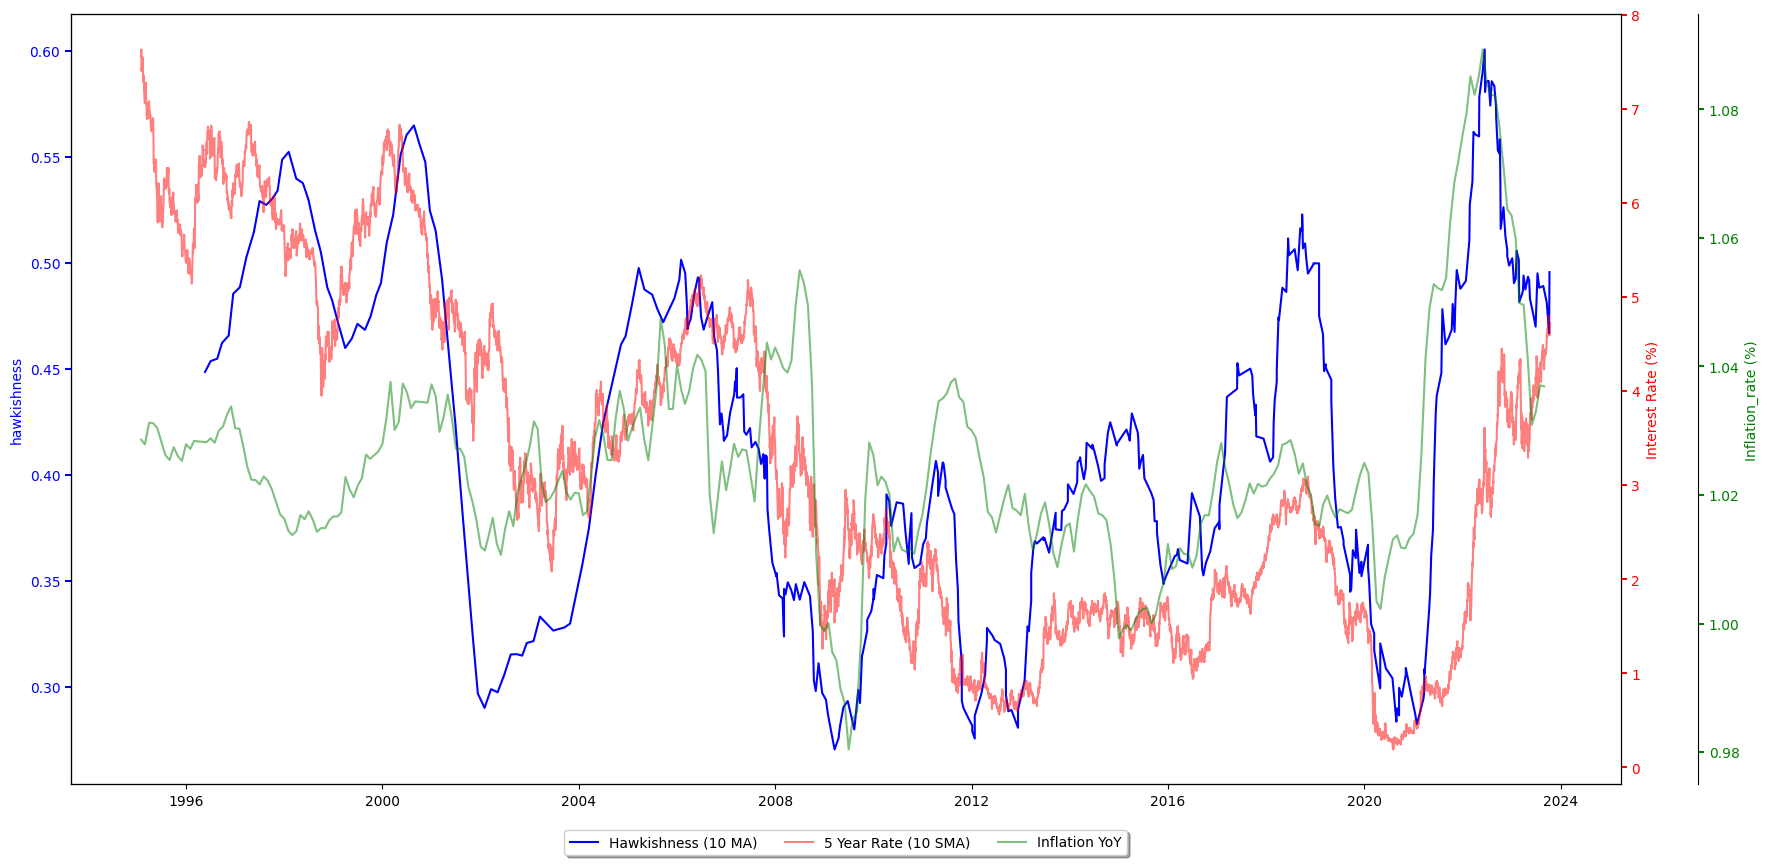

In [59]:
fig, ax = plt.subplots(figsize = (20,10))
# ln1 = ax.plot(hawkishness, "-o", alpha = 0.3, color = "grey", label = "Hawkishness")
ln2, = ax.plot(ma(hawkishness, 10), color = "blue", label = "Hawkishness (10 MA)")
ax2 = ax.twinx()
ln3, = ax2.plot(rate, color = "red", label = "5 Year Rate (10 SMA)", alpha = 0.5)
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.05))
ln4, = ax3.plot(inflation, color = "green", label = "Inflation YoY", alpha = 0.5)
lns = [ln2, ln3, ln4]
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("hawkishness")
ax2.set_ylabel("Interest Rate (%)")
ax3.set_ylabel("Inflation_rate (%)")
ax.yaxis.label.set_color(ln2.get_color())
ax2.yaxis.label.set_color(ln3.get_color())
ax3.yaxis.label.set_color(ln4.get_color())
tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=ln2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=ln3.get_color(), **tkw)
ax3.tick_params(axis='y', colors=ln4.get_color(), **tkw)

In [47]:
reload(tst)

<module 'testing' from '/Users/benjamin/Documents/Projects/Code/Python/fed-sentiment/testing.py'>

In [48]:
two_year = 1 + tst.get_fred("DGS2")[hawkishness.index[0]:].dropna()/100
five_year = 1 + tst.get_fred("DGS5")[hawkishness.index[0]:].dropna()/100
inflation = 1 + tst.get_fred("CPIAUCSL").pct_change(12)[hawkishness.index[0]:].dropna()
unemployment = 1 + tst.get_fred('UNRATE')[hawkishness.index[0]:].dropna()/100

In [49]:
corr_df_logs = tst.get_correlation_df(hawkishness, two_year, True, range(10, 101, 10), range(-60, 61, 10))
corr_df_levels = tst.get_correlation_df(hawkishness, two_year, False, range(10,101,10), range(-60,61,10))

In [50]:
df_log_max_corr_loc = tst.get_loc_max(corr_df_logs)
df_log_max_corr = corr_df_logs.loc[df_log_max_corr_loc]

df_level_max_corr_loc = tst.get_loc_max(corr_df_levels)
df_level_max_corr = corr_df_levels.loc[df_level_max_corr_loc]

print(f"Max Level Corr:\nLoc:{df_level_max_corr_loc}\nValue: {df_level_max_corr}\n\n")
print(f"Max Log Corr:\nLoc:{df_log_max_corr_loc}\nValue: {df_log_max_corr}\n\n")


Max Level Corr:
Loc:('shift_0', 'ma_90')
Value: 0.84490460560266


Max Log Corr:
Loc:('shift_-50', 'ma_30')
Value: 0.3197590468386851




In [57]:
rsquared_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60,61,10), "rsquared", two_year = two_year, inflation = inflation, unemployment = unemployment)
rsquared_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,0.076563,0.102699,0.119745,0.121776,0.127288,0.111678,0.109479,0.079757,0.092185,0.118393
shift_-50,0.068821,0.090783,0.119465,0.108184,0.102893,0.099368,0.094697,0.066391,0.093722,0.113838
shift_-40,0.052233,0.078339,0.08662,0.074415,0.080672,0.07712,0.057168,0.057419,0.06796,0.084144
shift_-30,0.057809,0.07305,0.087465,0.083852,0.081776,0.063605,0.049886,0.0446,0.05437,0.074878
shift_-20,0.085541,0.097279,0.113391,0.114664,0.109595,0.112759,0.101307,0.09801,0.12063,0.119008
shift_-10,0.05855,0.073382,0.06908,0.051791,0.069431,0.054747,0.055397,0.053126,0.08104,0.06859
shift_0,0.064659,0.087051,0.087001,0.071829,0.089248,0.083615,0.078308,0.0604,0.092985,0.093452
shift_10,0.038243,0.058165,0.061062,0.052595,0.055254,0.028771,0.034548,0.032128,0.055674,0.054502
shift_20,0.06504,0.084982,0.093825,0.100028,0.103873,0.067768,0.076927,0.075841,0.09102,0.090821
shift_30,0.024977,0.029472,0.042979,0.041702,0.031221,0.014032,0.015649,0.021873,0.026598,0.027192


In [58]:
rsquared_loc = tst.get_loc_max(rsquared_df)
print(f"Max R2:\nLoc:{rsquared_loc}\nValue: {rsquared_df.loc[rsquared_loc]}")

Max R2:
Loc:('shift_-60', 'ma_50')
Value: 0.12728844550260388


In [53]:
aic_df = tst.get_regression_df("two_year", hawkishness, True, range(10,101,10), range(-60, 61, 10), "aic", two_year = two_year, inflation = inflation, unemployment = unemployment)
aic_df

,ma_10,ma_20,ma_30,ma_40,ma_50,ma_60,ma_70,ma_80,ma_90,ma_100
shift_-60,-3985.562066,-3902.829834,-3827.201994,-3743.405664,-3674.25926,-3598.747713,-3529.662903,-3451.317895,-3357.855674,-3260.403663
shift_-50,-3994.286046,-3911.427687,-3840.85743,-3742.489527,-3672.932912,-3603.814932,-3541.094656,-3479.379859,-3387.865087,-3290.859642
shift_-40,-3921.492687,-3841.858849,-3773.26133,-3678.318378,-3616.149801,-3574.479452,-3481.132149,-3428.199354,-3340.327363,-3240.965539
shift_-30,-3894.688665,-3810.461492,-3740.785842,-3663.610032,-3588.803443,-3534.245182,-3446.598412,-3360.956437,-3263.051882,-3167.198929
shift_-20,-3923.242215,-3838.533562,-3770.974233,-3684.962838,-3603.306341,-3537.01977,-3448.627538,-3371.64831,-3279.163885,-3176.457075
shift_-10,-3911.401298,-3823.90983,-3733.545797,-3637.771334,-3566.621161,-3515.100304,-3435.464085,-3365.893042,-3278.658153,-3170.06071
shift_0,-3926.505255,-3843.836459,-3759.465235,-3661.340515,-3594.457656,-3562.833121,-3464.334645,-3395.342418,-3314.321551,-3209.44959
shift_10,-3896.323313,-3816.914604,-3736.640758,-3643.758272,-3567.996477,-3517.254584,-3444.257049,-3380.283512,-3286.9148,-3181.138389
shift_20,-3897.147769,-3820.989089,-3758.592708,-3671.094734,-3605.878603,-3539.349487,-3454.945581,-3374.164326,-3276.403329,-3170.678443
shift_30,-3916.167268,-3829.756683,-3764.657801,-3682.057222,-3594.582153,-3559.072727,-3464.609296,-3385.819723,-3297.017967,-3191.041179


In [ ]:
aic_loc = tst.get_loc_min(aic_df)
print(f"Min AIC:\nLoc:{aic_loc}\nValue: {aic_df.loc[aic_loc]}")

In [30]:
equal_series = tst.get_equivalent_series(hawkishness, True, 60, -60, two_year = two_year, inflation = inflation, unemployment = unemployment)
ols = tst.get_regression(equal_series["two_year"], equal_series["hawkishness"], equal_series["unemployment"], equal_series["inflation"])

In [31]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     14.05
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           1.13e-08
Time:                        11:36:01   Log-Likelihood:                 1778.0
No. Observations:                 360   AIC:                            -3548.
Df Residuals:                     356   BIC:                            -3532.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.617e-05   9.21e-05      0.176      0.861      -0.000       0.000
x1             0.0890      0.017      5.116      0.000       0.055       0.123
x2            -0.0430      0.017     -2.601      0.010      -0.075      -0.010
x3             0.0355      0.023      1.516      0.130      -0.011       0.082
==============================================================================
Omnibus:                       47.671   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.482
Skew:                          -0.214   Prob(JB):                     2.84e-72
Kurtosis:                       7.667   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
tst.get_ar_x(np.array(rate), 1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 7183
Model:                     AutoReg(1)   Log Likelihood                9908.541
Method:               Conditional MLE   S.D. of innovations              0.061
Date:                Tue, 17 Oct 2023   AIC                         -19811.083
Time:                        11:36:07   BIC                         -19790.445
Sample:                             1   HQIC                        -19803.980
                                 7183                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.001      1.702      0.089      -0.000       0.005
y.L1           0.9991      0.000   2562.905      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(equal_series["hawkishness"], color = "red")
ax2 = ax.twinx()
ax2.plot(equal_series["two_year"], color = "blue")
ax3 = ax2.twinx()
ax.plot(equal_series["inflation"], color = "green")